In [1]:
import numpy as np
from sklearn.linear_model import lasso_path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Sample data
np.random.seed(12345)
n_samples, n_features = 50, 10
X = np.random.randn(n_samples, n_features)
y = np.random.randn(n_samples)

# Compute the Lasso path for a set of lambdas
alphas, coefs, _ = lasso_path(X, y)

# Compute the piecewise constant derivative d\beta/d\lambda
# The coefficients change at specific lambda values (kinks), so we focus on those points
d_beta_d_lambda = np.zeros_like(coefs[:, 1:])  # Initialize derivative array

for i in range(coefs.shape[0]):  # Iterate over features
    for j in range(1, coefs.shape[1]):  # Iterate over the alphas (lambdas)
        if coefs[i, j] != coefs[i, j - 1]:  # Check if the coefficient has changed
            d_beta_d_lambda[i, j - 1] = (coefs[i, j] - coefs[i, j - 1]) / (alphas[j - 1] - alphas[j])

## Perturbing $\lambda$

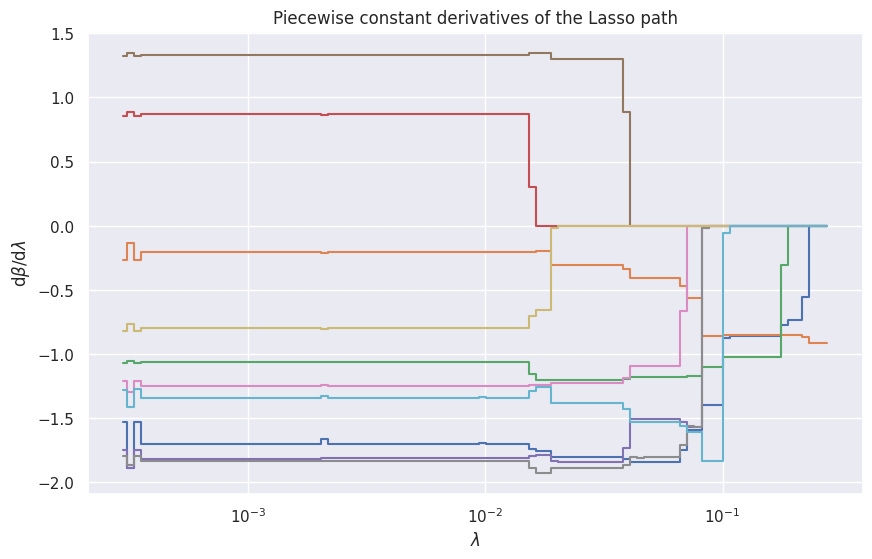

In [2]:
plt.figure(figsize=(10, 6))

for i in range(10):
    plt.step(alphas[1:], d_beta_d_lambda[i], where='mid')
    
plt.xlabel(r'$\lambda$')
plt.xscale('log')
plt.ylabel(r'd$\beta$/d$\lambda$')
plt.title('Piecewise constant derivatives of the Lasso path')
plt.show()

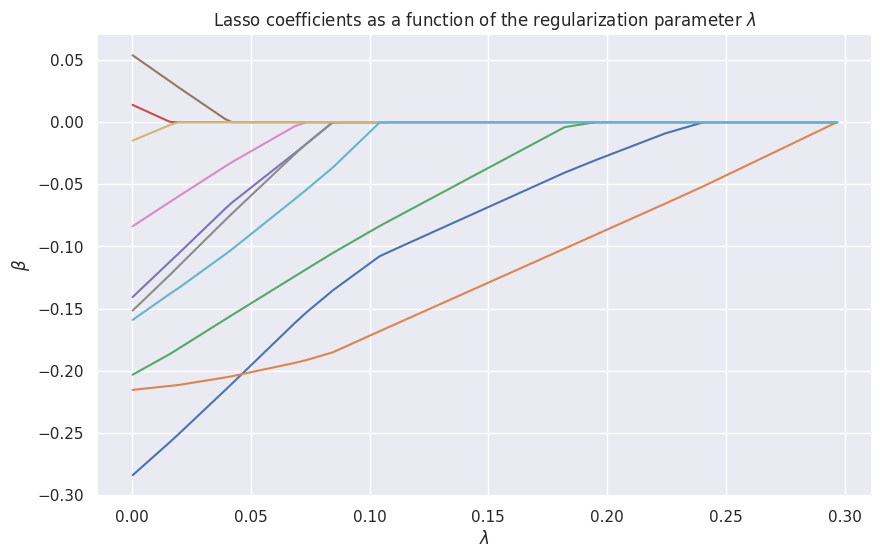

In [3]:
plt.figure(figsize=(10, 6))
# Plot the Lasso path (beta as a function of lambda)
for i in range(10):  # Plot for the first 5 features
    plt.plot(alphas, coefs[i], label=f'beta_{i+1}')

#plt.xscale('log')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\beta$')
plt.title('Lasso coefficients as a function of the regularization parameter $\lambda$')
#plt.legend()
plt.show()

## Perturbing $Y$

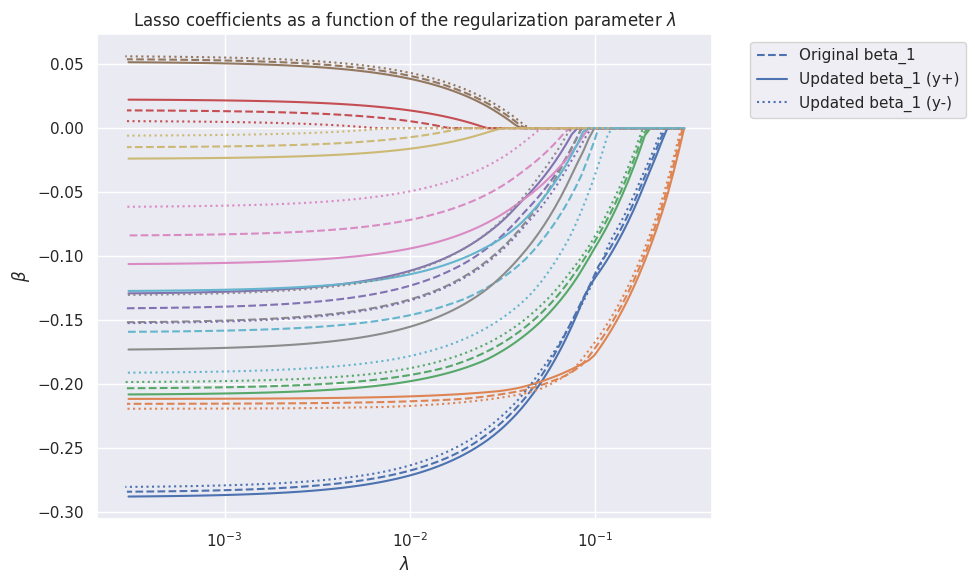

In [4]:
y_new = y + 0.1
alphas_new, coefs_new, _ = lasso_path(X, y_new)

y_minus = y - 0.1
alphas_minus, coefs_minus, _ = lasso_path(X, y_minus)

# Plot the original, y = y + 0.1, and y = y - 0.1 Lasso paths with adjusted legend
plt.figure(figsize=(10, 6))

# Plot the original Lasso path (beta as a function of lambda)
for i in range(n_features):
    plt.plot(alphas, coefs[i], linestyle='--')

# Plot the new Lasso path (after y = y + 0.1)
for i in range(n_features):
    plt.plot(alphas_new, coefs_new[i], color=plt.gca().lines[i].get_color())

# Plot the Lasso path for y = y - 0.1
for i in range(n_features):
    plt.plot(alphas_minus, coefs_minus[i], linestyle=':', color=plt.gca().lines[i].get_color())

plt.xscale('log')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\beta$')
plt.title('Lasso coefficients as a function of the regularization parameter $\lambda$')

# Adjust the legend to only show the first feature
plt.legend([plt.gca().lines[0], plt.gca().lines[n_features], plt.gca().lines[2*n_features]], 
           ['Original beta_1', 'Updated beta_1 (y+)', 'Updated beta_1 (y-)'],
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


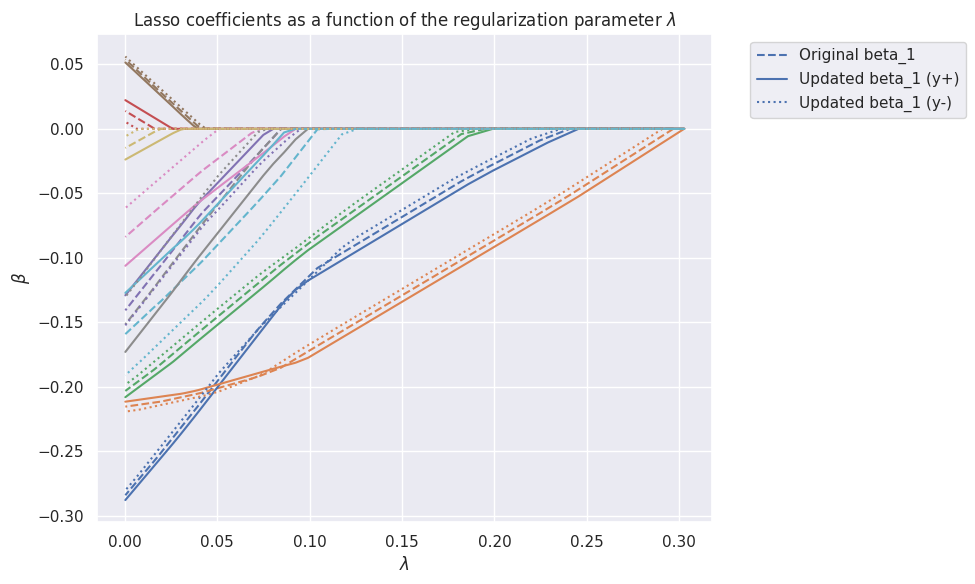

In [5]:
# Plot the original, y = y + 0.1, and y = y - 0.1 Lasso paths with adjusted legend
plt.figure(figsize=(10, 6))

# Plot the original Lasso path (beta as a function of lambda)
for i in range(n_features):
    plt.plot(alphas, coefs[i], linestyle='--')

# Plot the new Lasso path (after y = y + 0.1)
for i in range(n_features):
    plt.plot(alphas_new, coefs_new[i], color=plt.gca().lines[i].get_color())

# Plot the Lasso path for y = y - 0.1
for i in range(n_features):
    plt.plot(alphas_minus, coefs_minus[i], linestyle=':', color=plt.gca().lines[i].get_color())

plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\beta$')
plt.title('Lasso coefficients as a function of the regularization parameter $\lambda$')

# Adjust the legend to only show the first feature
plt.legend([plt.gca().lines[0], plt.gca().lines[n_features], plt.gca().lines[2*n_features]], 
           ['Original beta_1', 'Updated beta_1 (y+)', 'Updated beta_1 (y-)'],
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Augmenting the sample size $X_{n\times p} \Longrightarrow X_{2n\times p}$

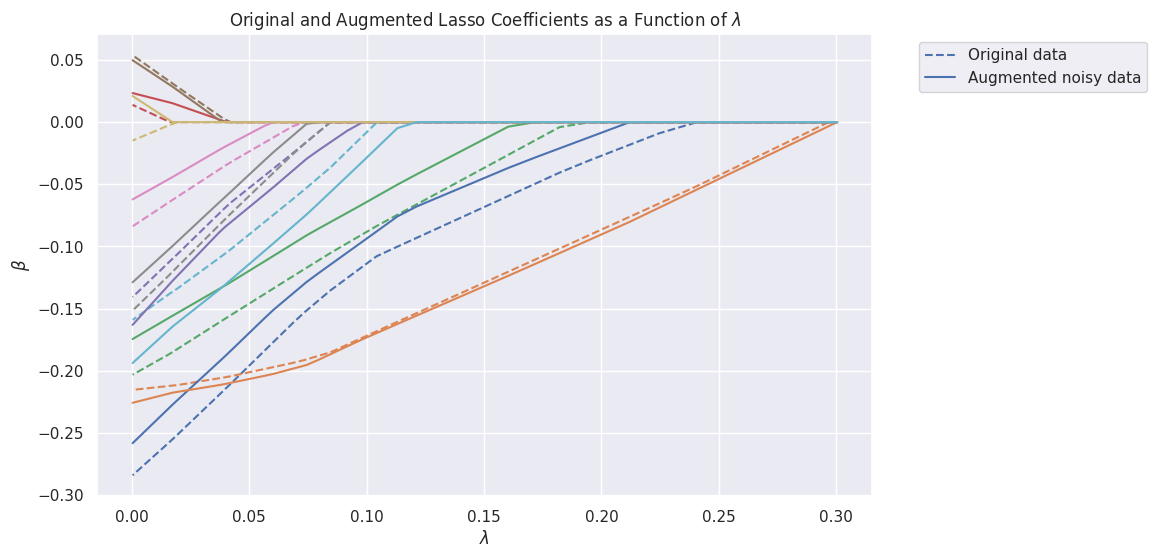

In [6]:
# Duplicate the data and add noise
X_augmented = np.vstack([X, X + 0.2 * np.random.randn(n_samples, n_features)])
y_augmented = np.hstack([y, y + 0.2 * np.random.randn(n_samples)])

# Compute the Lasso path for the augmented data
alphas_augmented, coefs_augmented, _ = lasso_path(X_augmented, y_augmented)

# Plot the Lasso paths (original and augmented) together
plt.figure(figsize=(10, 6))

# Plot the original Lasso path
for i in range(10):
    plt.plot(alphas, coefs[i], linestyle='--')

# Plot the augmented Lasso path
for i in range(10):
    plt.plot(alphas_augmented, coefs_augmented[i])

plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\beta$')
plt.title('Original and Augmented Lasso Coefficients as a Function of $\lambda$')
plt.legend([plt.gca().lines[0], plt.gca().lines[n_features]], 
           ['Original data', 'Augmented noisy data'],
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Multicoliearity and overfitting (check same colors) when augmenting covariates $X_{n\times p} \Longrightarrow X_{n\times 2p}$

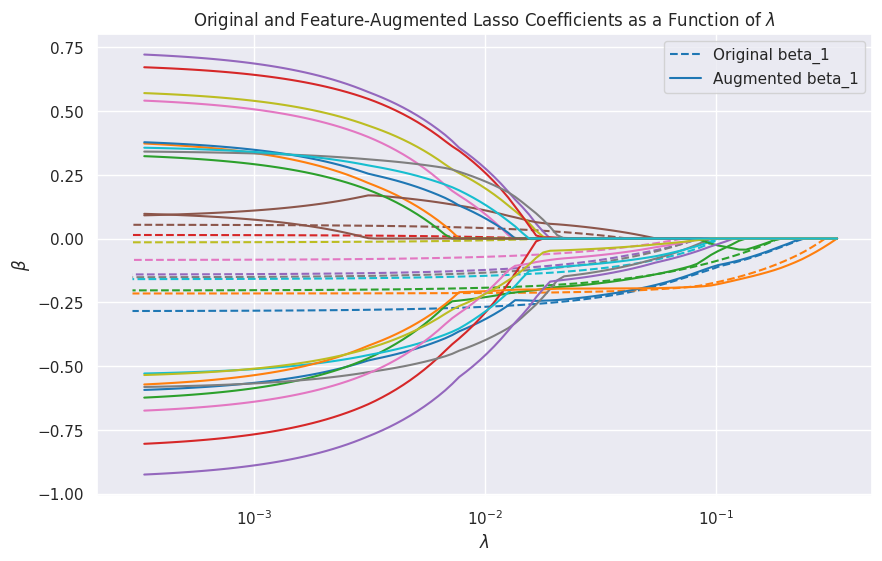

In [7]:
# Augment the features instead of the sample size
X_feature_augmented = np.hstack([X, X + 0.3 * np.random.randn(n_samples, n_features)])

# Compute the Lasso path for the feature-augmented data
alphas_feature_augmented, coefs_feature_augmented, _ = lasso_path(X_feature_augmented, y)

# Plot the Lasso paths (original and feature-augmented) with consistent colors for the first 10 features
plt.figure(figsize=(10, 6))

# Define color map for consistency
colors = plt.cm.tab10(np.linspace(0, 1, 10))

# Plot the original Lasso path with consistent colors
for i in range(10):
    plt.plot(alphas, coefs[i], linestyle='--', color=colors[i], label=f'Original beta_{i+1}' if i == 0 else "")

# Plot the feature-augmented Lasso path with the same color for the first 10 features and new colors for the rest
for i in range(20):
    if i < 10:
        plt.plot(alphas_feature_augmented, coefs_feature_augmented[i], color=colors[i], label=f'Augmented beta_{i+1}' if i == 0 else "")
    else:
        plt.plot(alphas_feature_augmented, coefs_feature_augmented[i], color=colors[i - 10], label="")

plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\beta$')
plt.title('Original and Feature-Augmented Lasso Coefficients as a Function of $\lambda$')
plt.legend(loc='best')
plt.xscale('log')
plt.show()
